<a href="https://colab.research.google.com/github/dietadestina/PA_EVCast/blob/main/data_ev_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [440]:
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('https://raw.githubusercontent.com/dietadestina/AI4Jobs_program/refs/heads/main/ev_cat_01-24.csv')

In [441]:
data

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01/01/01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,01/01/02,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,01/01/03,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,01/01/04,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,01/12/19,0,0,0,41,18,57,49,0,10,0,197,15,1,14412,1900,333
280,01/12/20,0,0,0,10,1,505,18,0,0,0,124,17,1,10230,4564,384
281,01/12/21,2,0,1,218,16,2483,133,0,2,0,124,17,0,24115,26150,494
282,01/12/22,0,0,0,146,30,2925,915,0,15,0,673,35,0,35604,64525,138


In [442]:
data.isna().sum()

,0
Date,0
FOUR WHEELER (INVALID CARRIAGE),0
HEAVY GOODS VEHICLE,0
HEAVY MOTOR VEHICLE,0
HEAVY PASSENGER VEHICLE,0
LIGHT GOODS VEHICLE,0
LIGHT MOTOR VEHICLE,0
LIGHT PASSENGER VEHICLE,0
MEDIUM GOODS VEHICLE,0
MEDIUM PASSENGER VEHICLE,0


In [443]:
data.duplicated().sum()

0

In [444]:
data.describe()

,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,0.341549,2.161972,0.514085,28.630282,44.806338,634.964789,80.306338,0.109155,2.732394,0.172535,26.721831,5.274648,0.443662,6805.221831,8129.883803,47.390845
std,1.223835,12.048276,1.024339,78.967099,132.064637,1671.032572,237.610605,0.410189,10.343169,1.233436,67.552702,11.173634,2.069549,13702.076927,21513.610306,129.932731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.750000,96.750000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,8.000000,48.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,201.000000,0.000000
75%,0.000000,1.000000,1.000000,1.250000,28.250000,86.250000,24.000000,0.000000,0.000000,0.000000,18.250000,3.000000,0.000000,7582.750000,1411.250000,1.000000
max,10.000000,183.000000,6.000000,543.000000,1645.000000,7609.000000,1787.000000,4.000000,86.000000,20.000000,673.000000,70.000000,24.000000,60618.000000,137113.000000,863.000000


In [445]:

data = data[data['Date'] != '0']
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

<ipython-input-445-2e86f4db8618>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
<ipython-input-445-2e86f4db8618>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


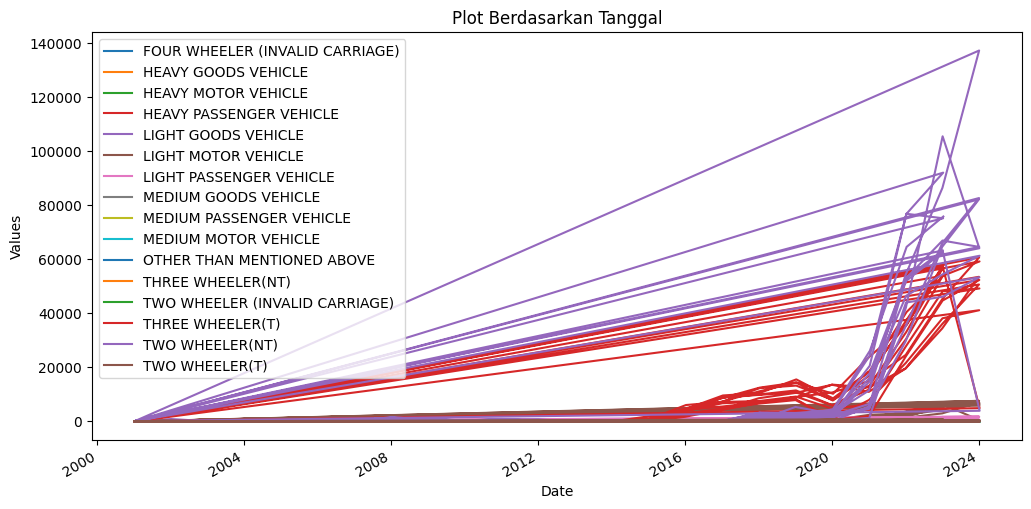

In [446]:
data.set_index('Date', inplace=True)

data.plot(figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Plot Berdasarkan Tanggal")
plt.show()

In [447]:
annual_data = data.resample('Y').sum()
annual_data.reset_index(inplace=True)
annual_data['Year'] = annual_data['Date'].dt.year
annual_data.drop(columns=['Date'], inplace=True)

features = annual_data.drop(columns=['Year']).values

<ipython-input-447-027852a13a69>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_data = data.resample('Y').sum()


In [448]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [449]:
n_input = 10
generator = TimeseriesGenerator(scaled_features, scaled_features, length=n_input, batch_size=1)

In [450]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, scaled_features.shape[1])))
model.add(Dense(scaled_features.shape[1]))  # Output sesuai dengan jumlah kolom fitur
model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_47 (LSTM)                       │ (None, 100)                 │          46,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │           1,616 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,416 (189.12 KB)

 Trainable params: 48,416 (189.12 KB)

 Non-trainable params: 0 (0.00 B)

In [451]:
model.fit(generator, epochs=50)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1338
Epoch 2/50
 8/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0686 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0805
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0915
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0409
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0683
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0321
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0412
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0423
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0261
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0191
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0234
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0239
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0174
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0220
Epoch 15/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0174
Epoch 16/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0162
Epoch 17/50
14/14 ━━━━━━━━━━

In [452]:
# Melakukan prediksi
predictions = model.predict(generator)

# Mengembalikan skala
predicted_values = scaler.inverse_transform(predictions)

# Membuat DataFrame hasil prediksi
predictions_df = pd.DataFrame(predicted_values, columns=annual_data.columns[1:])  # Mengambil nama kolom fitur
predictions_df['Year'] = annual_data['Year'][n_input:].values  # Mengambil tahun yang sesuai

print(predictions_df)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
    HEAVY GOODS VEHICLE  HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  \
0              1.640251            24.075108                 5.767544   
1              1.534632            25.307642                 8.059907   
2              1.537904            18.989008                 2.932323   
3              1.314069            16.215015                 3.220395   
4              1.246824            17.206488                 3.944113   
5              0.996731            13.814957                 2.810721   
6              0.746182            11.014666                 1.435876   
7             -0.656234             2.167938                 0.936368   
8             -0.401203             6.077338                -0.247752   
9              0.983640             2.148301                 1.400297   
10             3.918442            16.889845                 2.721814   
11            12.767608             7.999368                 2.460428   
12          

In [453]:
# Membuat prediksi dari model
y_pred_scaled = model.predict(generator)

# Mengubah skala kembali ke nilai asli
y_pred = scaler.inverse_transform(y_pred_scaled)

# Mendapatkan tahun yang sesuai untuk prediksi
years = annual_data['Year'].values[n_input:]  # Ambil tahun yang sesuai setelah n_input

# Membuat DataFrame untuk menyimpan hasil prediksi
predictions = pd.DataFrame(y_pred, columns=annual_data.columns[1:])  # Ambil nama kolom fitur
predictions['Year'] = years

print(predictions)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
    HEAVY GOODS VEHICLE  HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  \
0              1.640251            24.075108                 5.767544   
1              1.534632            25.307642                 8.059907   
2              1.537904            18.989008                 2.932323   
3              1.314069            16.215015                 3.220395   
4              1.246824            17.206488                 3.944113   
5              0.996731            13.814957                 2.810721   
6              0.746182            11.014666                 1.435876   
7             -0.656234             2.167938                 0.936368   
8             -0.401203             6.077338                -0.247752   
9              0.983640             2.148301                 1.400297   
10             3.918442            16.889845                 2.721814   
11            12.767608             7.999368                 2.460428   
12          

In [454]:
from sklearn.metrics import mean_squared_error

y_true = annual_data.drop(columns=['Year']).values[n_input:]
mse = mean_squared_error(y_true, y_pred)
print(f"MSE: {mse}")

MSE: 123243462.72019798


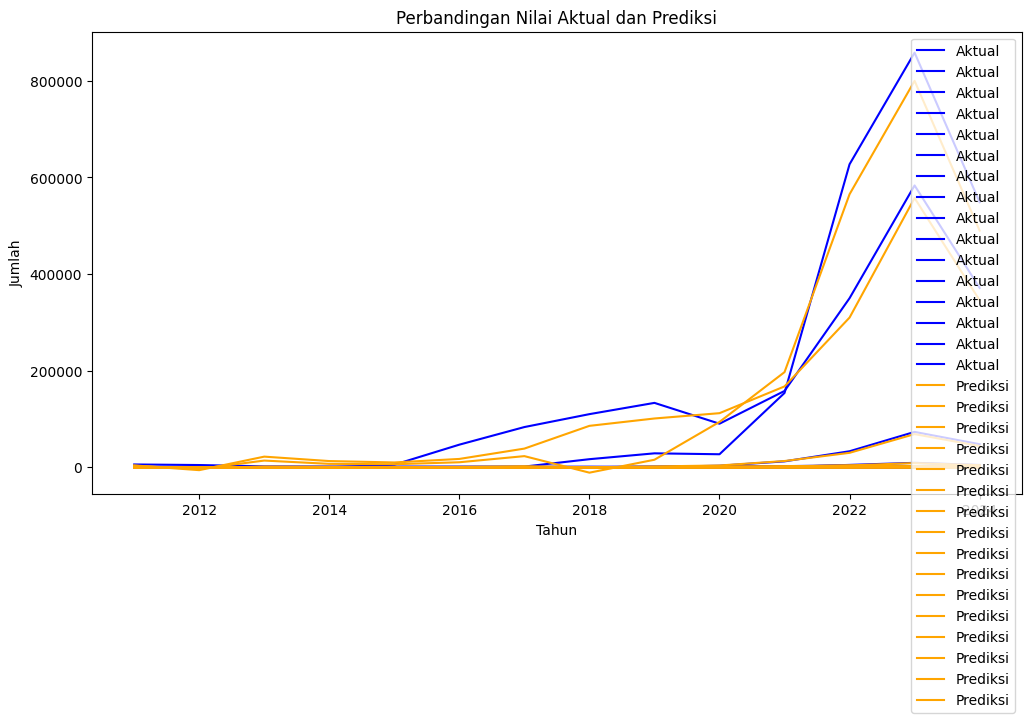

In [455]:
# Ambil tahun yang sesuai dengan prediksi
years = annual_data['Year'].values[n_input: n_input + y_pred.shape[0]]

plt.figure(figsize=(12, 6))
plt.plot(years, y_true, label='Aktual', color='blue')
plt.plot(years, y_pred, label='Prediksi', color='orange')
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.title("Perbandingan Nilai Aktual dan Prediksi")
plt.legend()
plt.show()

In [456]:
# Menggunakan prediksi untuk memprediksi tahun berikutnya
future_predictions = []
last_input = scaled_features[-n_input:]  # Ambil input terakhir

for _ in range(5):  # Misalkan kita ingin memprediksi 5 tahun ke depan
    pred_scaled = model.predict(last_input.reshape((1, n_input, scaled_features.shape[1])))
    pred = scaler.inverse_transform(pred_scaled)

    future_predictions.append(pred.flatten())

    # Update last_input untuk iterasi berikutnya
    last_input = np.append(last_input[1:], pred_scaled, axis=0)

future_predictions = pd.DataFrame(future_predictions, columns=annual_data.columns[1:])
future_predictions['Year'] = np.arange(annual_data['Year'].values[-1] + 1, annual_data['Year'].values[-1] + 6)
print(future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
   HEAVY GOODS VEHICLE  HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  \
0            28.745544           102.565842                 0.293139   
1            19.581396             6.928564                 3.078573   
2            14.055882           -23.454332                 9.579679   
3            10.105458           -54.246143                18.121687   
4             6.247422           -57.132526                21.667385   

   LIGHT GOODS VEHICLE  LIGHT MOTOR VEHICLE  LIGHT PASSENGER VEHICLE  \
0          2077.121826          4053.396240             39804.570312   
1          1518.435913          3487.866699             17431.828125   
2           966.882874          2905.041260             -3599.290771   
3            97.817162          2602.188721            -32602.759766   
4         -1208.

In [457]:
# Menggabungkan data aktual dan prediksi
combined_years = np.concatenate((annual_data['Year'].values, future_predictions['Year'].values))
combined_predictions = np.concatenate((y_true, future_predictions.iloc[:, :-1].values.flatten()))

# Visualisasi
plt.figure(figsize=(14, 7))
plt.plot(annual_data['Year'], y_true, label='Aktual', color='blue', marker='o')
plt.plot(future_predictions['Year'], future_predictions.iloc[:, :-1], label='Prediksi Masa Depan', color='orange', linestyle='--', marker='x')
plt.xlabel("Tahun")
plt.ylabel("Nilai")
plt.title("Visualisasi Prediksi Masa Depan")
plt.legend()
plt.grid()
plt.show()

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
from google.colab import files

ev_cat.to_csv('ev_cat.csv', index=False)
#files.download('ev_cat.csv')